In [15]:
import pygmt
import h5py
import numpy as np

In [16]:
with h5py.File("./OUTPUT_FILES/final_model.h5", "r") as f:
    vs = f["vs"][:]
    x = f["x"][:]
    y = f["y"][:]
    z = f["z"][:]
with h5py.File("./OUTPUT_FILES/model_iter.h5", "r") as f:
    stx = f["stlo_ph"][:]
    sty = f["stla_ph"][:]
region=[x.min(), x.max(), y.min(), y.max()]
XX, YY = np.meshgrid(x, y)

depth=4.0


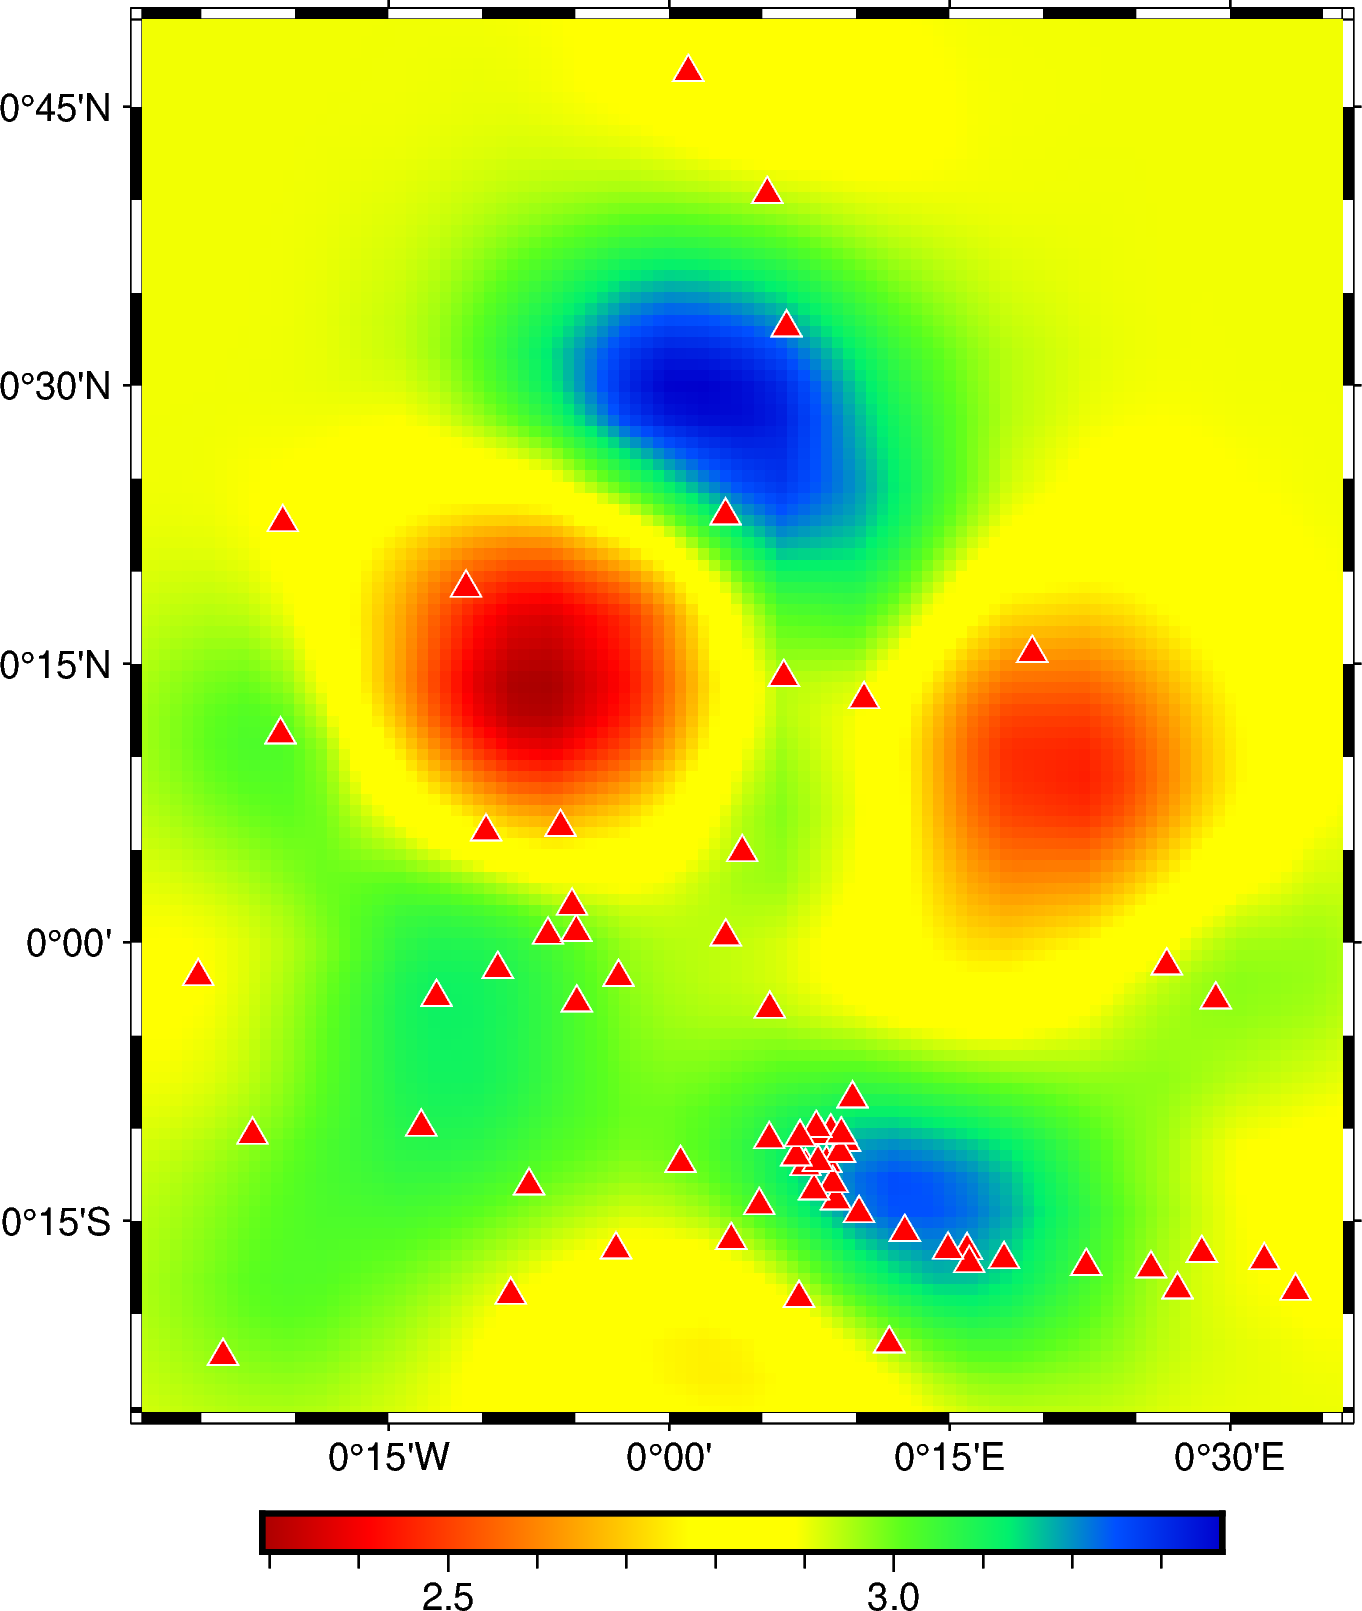

In [17]:
idep = 8
print('depth={}'.format(z[idep]))
fig = pygmt.Figure()
fig.basemap(region=region, projection="M4i", frame=True)
grid = pygmt.surface(x=np.ravel(XX), y=np.ravel(YY), z=np.ravel(vs[idep]), region=region, spacing="0.01" )
fig.grdimage(grid=grid, cmap="seis")
fig.plot(x=stx, y=sty, style="t0.3c", fill="red", pen="0.3p,255")
fig.colorbar()
fig.show()